In [21]:
!pip install tpot

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [22]:
import pandas as pd
import numpy as np
import sklearn 
from __future__ import print_function
import os
import subprocess
from time import time
from operator import itemgetter
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc 
from sklearn.cross_validation import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from sklearn.cross_validation import  cross_val_score
from IPython.display import Image
from IPython.display import display
import pydotplus
from sklearn import tree
from sklearn import metrics 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score 
import tpot
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

In [23]:

data = pd.read_csv('~/Desktop/datareach_labs.csv')

In [24]:
display(data.columns)
display(data.shape)

Index(['SEQN', 'RIAGENDR', 'RIDAGEYR', 'SDMVPSU', 'SDMVSTRA', 'LBXGH', 'LBXTC',
       'LBDHDL', 'LBXTR', 'LBDLDL', 'URXUMA', 'URXUCR', 'LBXSGL', 'LBXSUA',
       'LBXSCR', 'LBXCRP', 'LBXFB', 'LBXWBCSI', 'BMXBMI', 'BMXWAIST', 'BPXSAR',
       'BPXDAR', 'LBXFER', 'MEC12YR', 'hdl_dn', 'c_obess', 'smoke3', 'alcohol',
       'pre_htn', 'pre_dm', 'tri150', 'htn', 'race', 'gfr', 'dm', 'cvd',
       'albuminuria', 'crp05', 'lshs', 'URDACT', 'gfr60dn', 'stroke',
       'uricacid6', 'wbc6'],
      dtype='object')

(10835, 44)

In [25]:
data_cols = data[['race','LBXCRP','LBXTR', 'BMXWAIST', 'BPXSAR', 'BPXDAR', 'LBXSGL', 'LBDHDL', 'albuminuria']]

In [26]:
data_cols

,race,LBXCRP,LBXTR,BMXWAIST,BPXSAR,BPXDAR,LBXSGL,LBDHDL,albuminuria
0,1,0.08,347,99.9,122.000000,83.000000,95.0,42,0
1,2,0.04,62,90.7,123.000000,81.000000,81.0,105,0
2,2,0.12,45,108.0,142.000000,95.000000,87.0,51,0
3,1,0.19,146,112.8,174.000000,99.000000,75.0,38,1
4,1,1.03,202,114.5,119.000000,85.000000,95.0,55,0
5,1,1.11,167,130.6,124.000000,71.000000,136.0,49,1
6,2,0.15,97,85.6,115.000000,77.000000,90.0,41,0
7,2,0.45,122,88.6,128.000000,65.000000,100.0,36,1
8,3,0.18,210,91.0,113.000000,67.000000,154.0,66,0
9,1,0.27,97,110.4,118.000000,83.000000,100.0,46,0


In [27]:
#Divide the dataframe into the different races 
data_cols = data_cols[data_cols['race'] == 2] #For African Americans CHOOSE WHICH LINE IN THE CELL TO EXECUTE 
#data_cols = data_cols[data_cols['race'] == 1] #For Whites 
#data_cols = data_cols[data_cols['race'] == 3] #For Hispanics 

In [28]:
data_cols['albuminuria'].value_counts()

0    1686
1     398
Name: albuminuria, dtype: int64

In [29]:
data_cols.shape
data_cols = data_cols.dropna(axis=0, how='any')


In [30]:
data_cols.shape

(2035, 9)

In [31]:
data_cols.columns

Index(['race', 'LBXCRP', 'LBXTR', 'BMXWAIST', 'BPXSAR', 'BPXDAR', 'LBXSGL',
       'LBDHDL', 'albuminuria'],
      dtype='object')

In [32]:
X = data_cols[['LBXTR','BMXWAIST', 'BPXSAR', 'BPXDAR', 'LBXSGL', 'LBDHDL']] 

In [33]:
Y = data_cols['albuminuria']

In [34]:
display(type(X))
display(type(Y))
Y.shape

pandas.core.frame.DataFrame

pandas.core.series.Series

(2035,)

In [35]:
X = np.array(X)
Y = np.array(Y)

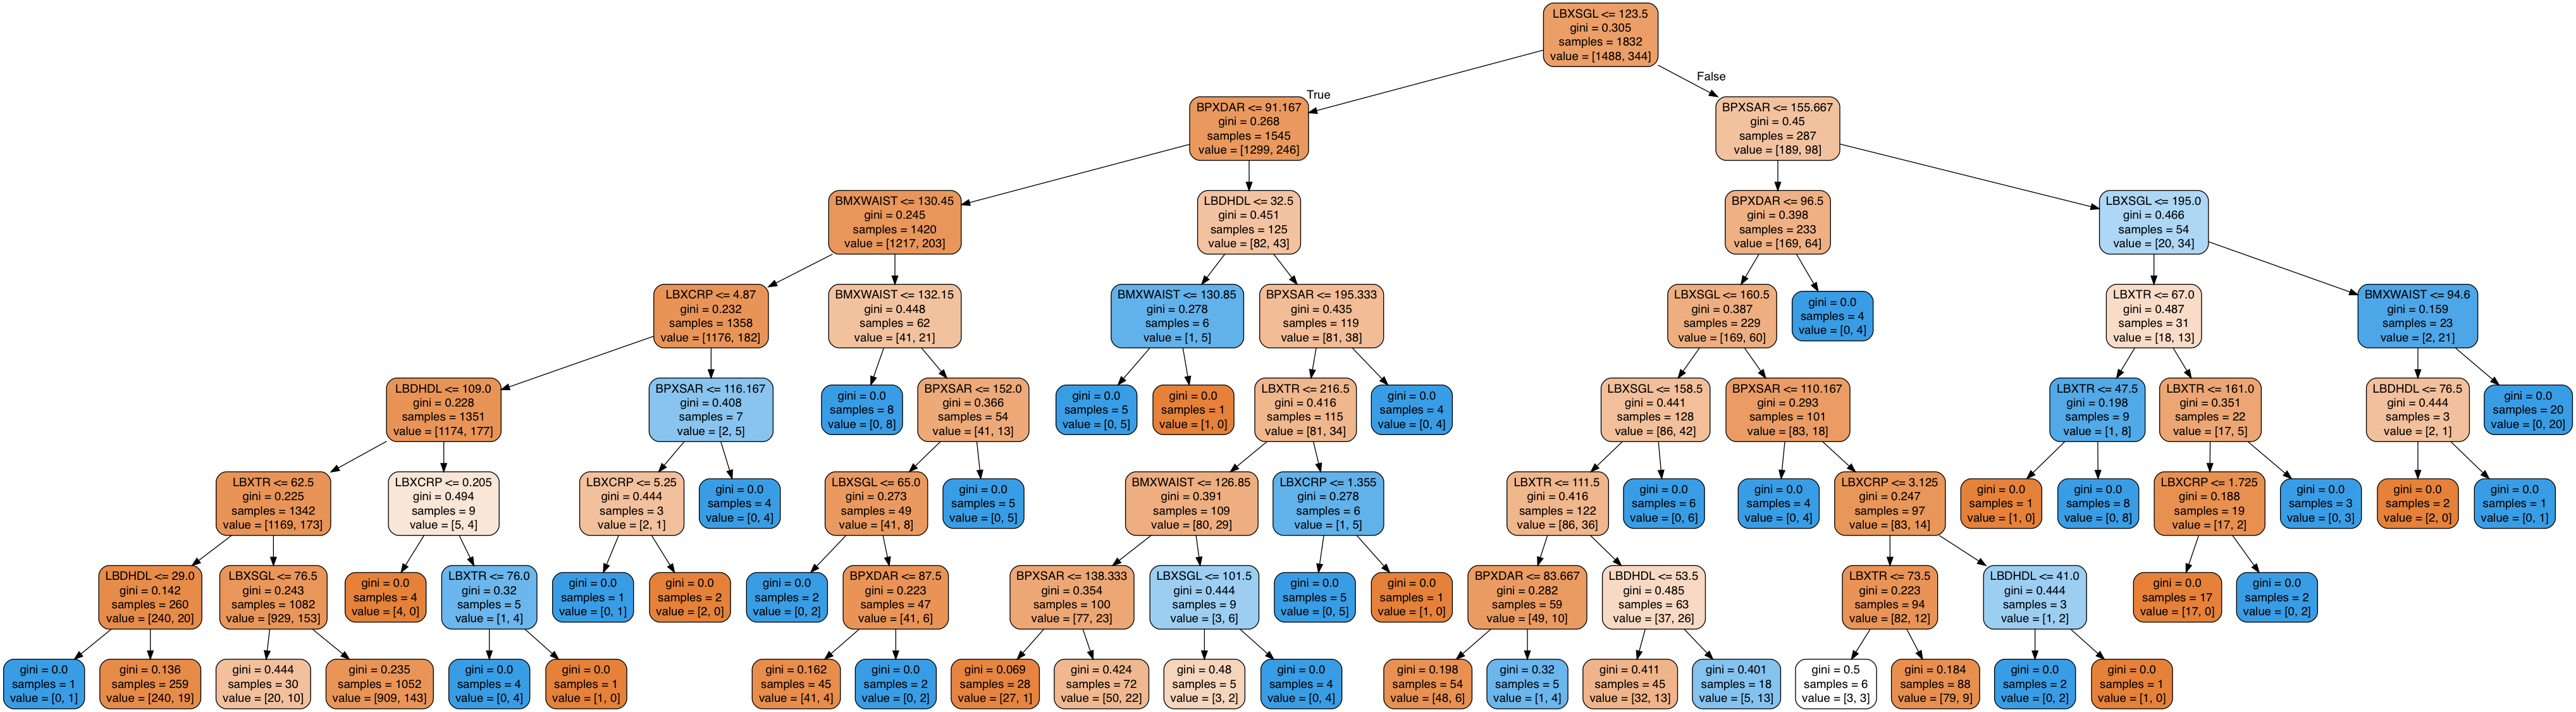

In [16]:
X_cols = ['LBXCRP','LBXTR', 'BMXWAIST', 'BPXSAR', 'BPXDAR', 'LBXSGL', 'LBDHDL']
predictions = []
predictions_proba = []
truevals = []

kfold = StratifiedKFold(y=Y, n_folds=10, shuffle = True, random_state = 3,)
decTree = DecisionTreeClassifier(max_depth = 7)
for i, (train,test) in enumerate(kfold):
    decTree.fit(X[train], Y[train])
    predictions_proba.extend(decTree.predict_proba(X[test])[:, 1].tolist())
    predictions.extend(decTree.predict(X[test]).tolist()) 
    truevals.extend(Y[test].tolist())
    
dot_data = tree.export_graphviz(decTree, out_file=None, feature_names = X_cols, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png()) 
    

In [36]:

X_train, X_test, y_train, y_test = train_test_split(X, Y,train_size=0.75, test_size=0.25) 
tpot = TPOTClassifier(generations=5, verbosity=2, scoring = 'roc_auc')  
tpot.fit(X_train, y_train)  
print(tpot.score(X_test, y_test)) 

Optimization Progress:  33%|███▎      | 200/600 [01:34<02:14,  2.98pipeline/s]

Generation 1 - Current best internal CV score: 0.6650082472012965


Optimization Progress:  50%|█████     | 300/600 [02:43<02:49,  1.77pipeline/s]

Generation 2 - Current best internal CV score: 0.6650082472012965


Optimization Progress:  67%|██████▋   | 400/600 [04:06<02:17,  1.46pipeline/s]

Generation 3 - Current best internal CV score: 0.6666669461558135


Optimization Progress:  83%|████████▎ | 500/600 [06:28<01:29,  1.12pipeline/s]

Generation 4 - Current best internal CV score: 0.6785509491135395


Generation 5 - Current best internal CV score: 0.6792744210900811

Best pipeline: KNeighborsClassifier(RFE(input_matrix, criterion=entropy, max_features=0.35, n_estimators=100, step=0.1), n_neighbors=100, p=2, weights=distance)
0.749013073571


In [20]:
#export tpot pipeline 
tpot.export('tpot_AA_AUC.py')

True

In [189]:
x = decTree.feature_importances_



In [190]:

for i in range (0, len(x)):
    print (X_cols[i]+" "+str(x[i]))


    


LBXCRP 0.110586991707
LBXTR 0.155728345885
BMXWAIST 0.141487231994
BPXSAR 0.193133791715
BPXDAR 0.128740360673
LBXSGL 0.201467705026
LBDHDL 0.068855573


In [191]:
print("Model evaluation metrics: ")
print("AUC:"+ str(roc_auc_score(truevals, predictions_proba)))
print("Accuracy:"+str(accuracy_score(truevals, predictions)))
print("Recall:"+ str(recall_score(truevals, predictions)))
print("Precision:"+ str(precision_score(truevals, predictions)))


Model evaluation metrics: 
AUC:0.567161720876
Accuracy:0.807862407862
Recall:0.162303664921
Precision:0.466165413534


In [192]:
predictions_proba

[0.09236234458259325,
 0.15280135823429541,
 0.15280135823429541,
 0.09236234458259325,
 0.15280135823429541,
 0.15280135823429541,
 0.15280135823429541,
 0.15280135823429541,
 0.23376623376623376,
 0.24271844660194175,
 0.09236234458259325,
 0.09236234458259325,
 0.15280135823429541,
 0.15280135823429541,
 0.23376623376623376,
 0.0,
 0.15280135823429541,
 0.23376623376623376,
 0.23376623376623376,
 0.12173913043478261,
 0.09236234458259325,
 1.0,
 0.09236234458259325,
 0.15280135823429541,
 0.23376623376623376,
 0.09236234458259325,
 0.15280135823429541,
 0.09236234458259325,
 0.15280135823429541,
 0.15280135823429541,
 0.12173913043478261,
 0.23376623376623376,
 0.12173913043478261,
 0.24271844660194175,
 0.0,
 1.0,
 0.15280135823429541,
 0.15280135823429541,
 0.09236234458259325,
 0.23376623376623376,
 0.15280135823429541,
 0.15280135823429541,
 0.09236234458259325,
 0.23376623376623376,
 0.15280135823429541,
 0.15280135823429541,
 0.15280135823429541,
 0.09236234458259325,
 0.23376